In [1]:
import pandas as pd


file1 = "../dataset/predicted_stances/updated_predicted_stances.csv"
df1 = pd.read_csv(file1)


file2 = "../dataset/expertData/TheClimateChangeTwitterDataset.csv"
df2 = pd.read_csv(file2)


In [2]:

matches = df1['id'].isin(df2['id'])


num_matches = matches.sum()
print(f"Number of matching IDs: {num_matches}")


Number of matching IDs: 1415


In [3]:

matched_ids = df1[df1['id'].isin(df2['id'])]


unique_users = matched_ids['user'].nunique()
print(f"Number of unique users in file1 with matching IDs: {unique_users}")

Number of unique users in file1 with matching IDs: 490


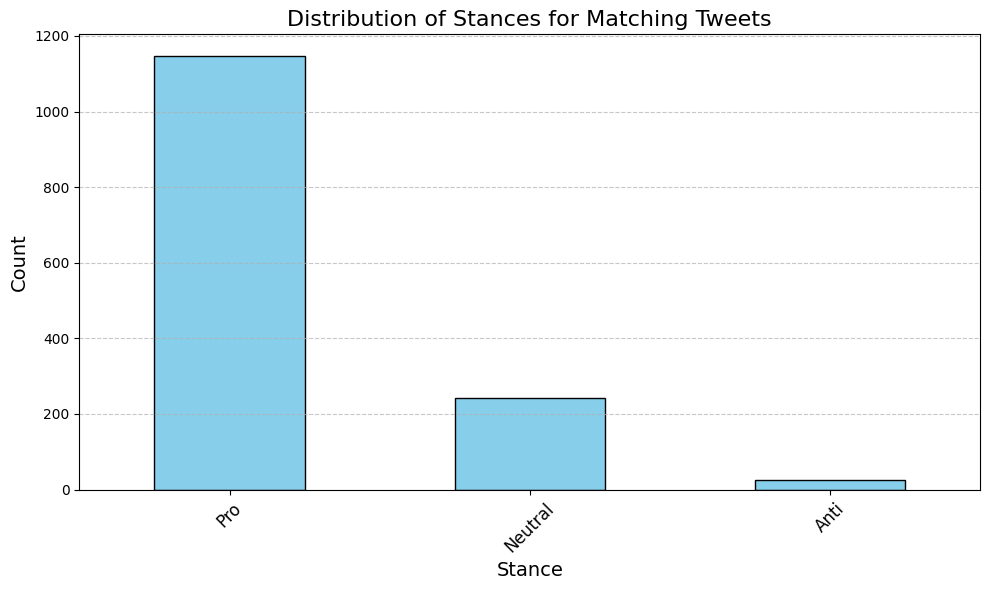

In [5]:
import matplotlib.pyplot as plt


stance_counts = matched_ids['predicted_stance'].value_counts()


plt.figure(figsize=(10, 6))
stance_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Stances for Matching Tweets', fontsize=16)
plt.xlabel('Stance', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:

stance_percentages = matched_ids['predicted_stance'].value_counts(normalize=True) * 100
print("Percentage of each stance:")
print(stance_percentages)

Percentage of each stance:
predicted_stance
Pro        81.060071
Neutral    17.102473
Anti        1.837456
Name: proportion, dtype: float64


In [7]:

merged_df = pd.merge(matched_ids, df2[['id', 'lat', 'lng']], on='id', how='inner')


merged_df.to_csv("filtered_users_with_locations.csv", index=False)
print("Filtered rows with locations saved to 'filtered_users_with_locations.csv'.")

Filtered rows with locations saved to 'filtered_users_with_locations.csv'.
